In [2]:
import os
import numpy as np
import glob
from matplotlib import pyplot as plt
from lmfit import minimize, Parameters, report_fit
#%%
os.chdir(r'C:\Users\yttap\Documents\PostDoc\SAXSmeas\SAXS_Al_gel\ascii_2016\v8')

lista = sorted(glob("*.dat"), key = len)

def abrir(archivo):
    return np.transpose(np.loadtxt(archivo))
q,I = abrir(lista[0])
#%%
def residual(params, q, I):
    G = params['G']
    R = params['R']
    d = params['d']
    q_1 = pow((1/R*(3*d/2)),(1/2))
    model = ((q<=q_1) * (G*np.exp((pow(q,2)*pow(R,2)/3))) + (q>q_1) * (G*(np.exp(-d/2)*pow((3*d/2),(d/2))*(1/R))/pow(q,d)))
    return I - model

params = Parameters()
params.add('G', value = 1,  vary = True)
params.add('R', value = 1,  vary = True)
params.add('d', value = 1,  vary = True)

#Filtro los primeros datos
q_new = q[q>0.2]
I_new = I[29:]

out = minimize(residual, params, args = (q_new,I_new))
res = out.params.valuesdict()
print(report_fit(out))
yf = I - out.residual

#%%
plt.plot(q_new,I_new)
# plt.plot(q,yf)
# plt.xlim(0.1,1)
plt.ylim(0.3e6, 4e6)
plt.xlabel('q$(nm^{-1})$')
plt.ylabel('Intensity')

TypeError: 'module' object is not callable

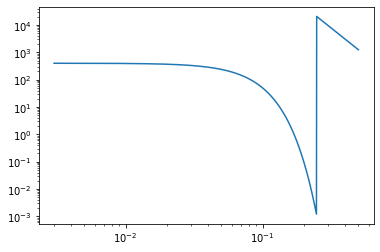

In [13]:
def fp(q,q_1,G,R,d):
    return ((q<=q_1) * (G*np.exp(-(pow(q,2)*pow(R,2)/3))) + (q>q_1) * (G*(np.exp(-d/2)*pow((3*d/2),(d/2))*(1/R))/pow(q,d)))

#G=400,D=4.5e-6,Rg=25,s=0,d=4,q0=0.248,b=1e-6
xd = np.linspace(0.003,0.5,500)
plt.figure()
yd = fp(xd,0.248,400,25,4)
plt.loglog(xd,yd)